<p><img style="padding: 0 15px; float: left;" src="Images/FTLogo300.jpg" alt="FT Crusader Logo" Width='140' Height= '250'/></p> 
<p> <h2> Saint Paul Vacant Building Report by Abu Nayeem; 05/06/19</h2> <a name="tc"></a>
<p> <h3> By Abu Nayeem</h3>

### Table of Contents

* Intro
* [Data Exploration](#explore)
    - [Distribution Plots](#dist)
    - [Vacancy by District Council](#council)
    - [Vacancy by Ward](#ward)
* Interactive Vacant Buildings Maps
    - [Interactive Map: Saint Paul Vacant Building by Year](#spyear)
    - [Interactive Map: Saint Paul Vacant Buildings by Dwelling Type](#spdwell)
    - [Interactive Map: District 7/ Ward 1 Vacant Building by Dwelling Type](#spward1)
    - [Interactive Crime Map with Vacant Building for Ward1](#crime)
* [Concluding Remarks](#conclude)
* [Running Code](#code)

### Introduction

On the city of Saint Paul Data Portal, there is information on the number of current vacant buildings in Saint Paul. You can download the data from [here](https://information.stpaul.gov/Buildings-Housing-Economic-Development/Vacant-Buildings-Dataset/fgbn-288b). If a building is occupied, then it will be removed for the list. Thus there will be more vacant houses within the last 2 to 3 years. The number of vacant properties can provide concern for a community but also an opportunity to revitalize an area. Classic example of urban blight is when many commercial fronts have closed down, which impacts development nearby. Vacant/abandoned properties, for better or for worse could provides a space space for illicit activities or it can provide housing for the homeless and downtrodden.

With this report, I hope residents can find areas that need more resources (i.e. economic development and housing resources) and consider options in dealing with the looming housing. 

#### Data <a name="explore"></a>

This dataset contains all of the registered vacant buildings in the City, as well as their type, and Vacant Building Category. 

In [32]:
df.head(2)

,Address,VacantDate,Dwelling,Vacant_Building_Category,Ward,District,Census_Tract,Coordinates,DistrictCouncilMap,CouncilWard,Gunk1,Gunk2,Latitude,Longitude,Datetime,Year,Date
0,937 SHERBURNE AVE,04/30/2019 12:00:00 AM,Duplex,2,1.0,7.0,32500.0,"(44.9567603300828, -93.139762414751)",10.0,7.0,55.0,47.0,44.95676,-93.139762,2019-04-30,2019,2019-04-30
1,535 FOREST ST,04/26/2019 12:00:00 AM,Single Family Residential,2,7.0,4.0,34500.0,"(44.957410404869, -93.061161243197)",15.0,2.0,196.0,42.0,44.95741,-93.061161,2019-04-26,2019,2019-04-26


#### Vacant Buildings by Year Plot <a name="dist"></a>

Text(0.5, 1.0, 'Current Vacant Buildings by Year of Vacancy')

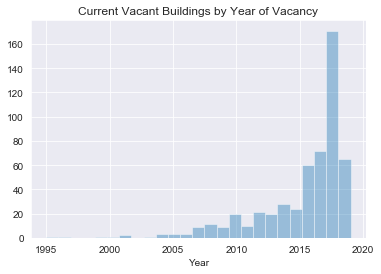

In [11]:
sns.set_style("darkgrid") #white, white-grid, ticks
sns.distplot(df['Year'], kde=False).set_title("Current Vacant Buildings by Year of Vacancy")

#### Vacant Buildings Types

In [12]:
print(df['Dwelling'].value_counts().sort_index(level=1))

Commercial                    71
Duplex                        94
Mixed Use                      9
Multi-family Residential      23
Single Family Residential    339
Name: Dwelling, dtype: int64


### Vacant Buildings Broken Down by District Council <a name="council"></a>

Text(0.5, 1.0, 'Current Vacant Buildings by District Council')

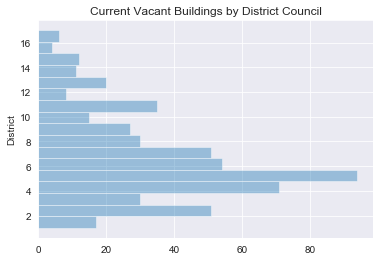

In [13]:
sns.distplot(df['District'], bins=17, vertical=True, kde=False).set_title("Current Vacant Buildings by District Council")

#### Vacant Dwellings Categories broken down by District

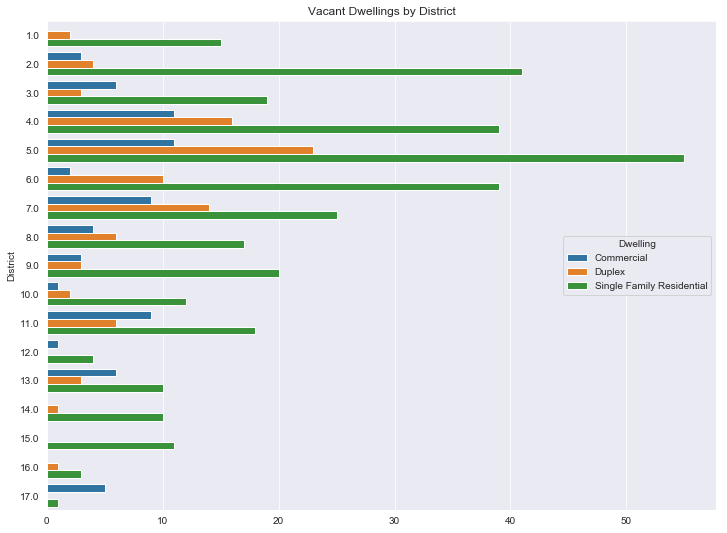

In [14]:
barplot('District',12,9)

### Vacant Buildings Broken Down by Ward <a name="ward"></a>

Text(0.5, 1.0, 'Current Vacant Buildings by Ward Grid')

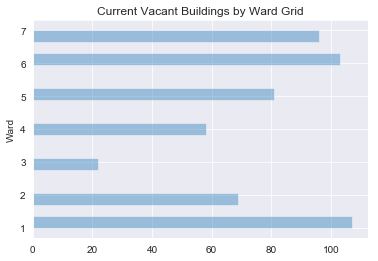

In [15]:
sns.distplot(df['Ward'], bins=17, vertical=True, kde=False).set_title("Current Vacant Buildings by Ward Grid")

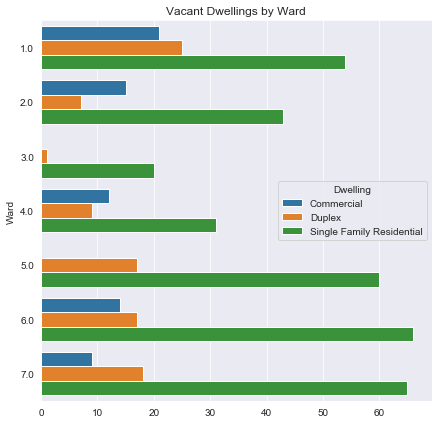

In [50]:
barplot('Ward',7,7)

### Interactive Saint Paul Vacant Buildings Map by Year Range <a name="spyear"></a>

**CLick on dots to get more information**; please zoom in

**Legend: Vacant Year Range**

- Red: Earlier than 2013
- Orange: 2013 to 2015
- Brown: 2016
- Blue: 2017
- Green 2018 to present

In [16]:
map_Vacancy_byYear()

### Saint Paul Interactive Vacant Buildings by Dwelling Type <a name="spdwell"></a>


**Legend: Dwelling Type**

- Red: Mixed Use
- Orange: Duplex
- Brown: Commercial
- Blue: Multi-Family
- Green: Single Family


In [17]:
map_Vacancy_TypeWard()

### Interactive Vacant Buildings by Dwelling for Thomas-Dale-Frogtown  Community <a name="spward1"></a>

**Legend: Dwelling Type**

- Red: Mixed Use
- Orange: Duplex
- Brown: Commercial
- Blue: Multi-Family
- Green: Single Family

In [18]:
map_Vacancy_TypeDistrict(7)

### Interactive Vacant Buildings by Dwelling type Ward 1

**Legend: Dwelling Type**

- Red: Mixed Use
- Orange: Duplex
- Brown: Commercial
- Blue: Multi-Family
- Green: Single Family

In [19]:
map_Vacancy_TypeWard(1)

### Interactive Hotspot Crime Map (from 2018 to Present) w/ Vacant Buildings for Ward 1 

Green: Hotspot of at least 8 crimes or more

Orange: Vacant buildings

Note: The Crime Dataset is clean from Frogtown Map Project. This was my first attempt of combining to different datasets together in a map

In [20]:
Map_Frogtown_VacantBuilding_Crime_Current()

### Concluding Remarks <a name="conclude"></a>

There are some neighborhoods with clusters of vacant buildings. How should the community deal with this? how should revitalize look like? Is there a correlation between hotspots and vacant buildings? Feel free to explore. 

### Run Code <a name="code"></a>

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import scipy.stats as stats #used to get correlation coefficient
import folium

#load data
df = pd.read_csv('Data/Vacant_Buildings_-_Dataset.csv')
cols= ['Address','VacantDate','Dwelling','Vacant_Building_Category','Ward','District','Census_Tract','Coordinates','DistrictCouncilMap','CouncilWard','Gunk1','Gunk2']
df.columns= cols

# Get Coordinates by splitting
new=df['Coordinates'].str.split(",", n = 1, expand = True) 
df['Latitude']= pd.to_numeric(new[0].str[1:]) #pd.to_numeric convert it to float
df['Longitude']= pd.to_numeric(new[1].str.rstrip(')'))

# Get Year and Date Variable
df['Datetime']= pd.to_datetime(df['VacantDate'])
df['Year']=df['Datetime'].dt.year
df['Date']=pd.to_datetime(df['Datetime']).apply(lambda x: x.date())
df=df.query('Latitude != "NaN"')

def map_Vacancy_byYear():
    # generate a new map
    FG_map = folium.Map(location=[44.9608901, -93.1010336], zoom_start=12,tiles="OpenStreetMap")
    
    #setup
    Index =['Address','Date','Dwelling', 'Ward','District','Latitude','Longitude','Year']
    B=df[Index]

    T=B.query('Year <= 2012')
    V=B.query('Year > 2012 and Year < 2016')
    N=B.query('Year == 2016')
    A=B.query('Year == 2017')
    D=B.query('Year in (2018,2019)')

    for index, row in T.iterrows(): 
        popup_text = "Address: {}<br>District: {}<br>Ward: {}<br> Date: {}<br> Dwelling:{}"
        popup_text = popup_text.format(row["Address"],row['District'],row['Ward'],row['Date'],row['Dwelling']) 
        folium.CircleMarker(location=(row["Latitude"],row["Longitude"]),
                            radius=5,
                            color= "#FF0000", #red 
                            popup=popup_text,
                            fill=True).add_to(FG_map)

    for index, row in V.iterrows(): 
        popup_text = "Address: {}<br>District: {}<br>Ward: {}<br> Date: {}<br> Dwelling:{}"
        popup_text = popup_text.format(row["Address"],row['District'],row['Ward'],row['Date'],row['Dwelling']) 
        folium.CircleMarker(location=(row["Latitude"],row["Longitude"]),
                            radius=5,
                            color="#E37222", #orange
                            popup=popup_text,
                            fill=True).add_to(FG_map)    

    for index, row in N.iterrows(): 
        popup_text = "Address: {}<br>District: {}<br>Ward: {}<br> Date: {}<br> Dwelling:{}"
        popup_text = popup_text.format(row["Address"],row['District'],row['Ward'],row['Date'],row['Dwelling']) 
        folium.CircleMarker(location=(row["Latitude"],row["Longitude"]),
                            radius=5,
                            color="#654321", #brown
                            popup=popup_text,
                            fill=True).add_to(FG_map)     

    for index, row in A.iterrows(): 
        popup_text = "Address: {}<br>District: {}<br>Ward: {}<br> Date: {}<br> Dwelling:{}"
        popup_text = popup_text.format(row["Address"],row['District'],row['Ward'],row['Date'],row['Dwelling'])  
        folium.CircleMarker(location=(row["Latitude"],row["Longitude"]),
                            radius=5,
                            color="#0000ff", #blue
                            popup=popup_text,
                            fill=True).add_to(FG_map)
        
    for index, row in D.iterrows(): 
        popup_text = "Address: {}<br>District: {}<br>Ward: {}<br> Date: {}<br> Dwelling:{}"
        popup_text = popup_text.format(row["Address"],row['District'],row['Ward'],row['Date'],row['Dwelling'])  
        folium.CircleMarker(location=(row["Latitude"],row["Longitude"]),
                            radius=5,
                            color='#007849', #green  
                            popup=popup_text,
                            fill=True).add_to(FG_map)    

    return FG_map



def map_Vacancy_TypeDistrict(Dis='All'):
    # generate a new map
    FG_map = folium.Map(location=[44.958326, -93.122926], zoom_start=14,tiles="OpenStreetMap")
    
    #setup
    Index =['Address','Date','Dwelling', 'Ward','District','Latitude','Longitude','Year']
    if Dis=='All':
        B=df
    else:
        B=df[(df['District']==Dis)]
    B=B[Index]

    T=B.query('Dwelling == "Mixed Use"')
    V=B.query('Dwelling=="Duplex"')
    N=B.query('Dwelling == "Commerical"')
    A=B.query('Dwelling == "Multi-family Residential"')
    D=B.query('Dwelling == "Single Family Residential"')
    
#Create Frogtown GeoMap
    FG_map = folium.Map(location=[44.958326, -93.122926], zoom_start=14,tiles="OpenStreetMap")

    for index, row in T.iterrows(): 
        popup_text = "Address: {}<br>District: {}<br>Ward: {}<br> Date: {}<br> Dwelling:{}"
        popup_text = popup_text.format(row["Address"],row['District'],row['Ward'],row['Date'],row['Dwelling']) 
        folium.CircleMarker(location=(row["Latitude"],row["Longitude"]),
                            radius=5,
                            color= "#FF0000", #red 
                            popup=popup_text,
                            fill=True).add_to(FG_map)

    for index, row in V.iterrows(): 
        popup_text = "Address: {}<br>District: {}<br>Ward: {}<br> Date: {}<br> Dwelling:{}"
        popup_text = popup_text.format(row["Address"],row['District'],row['Ward'],row['Date'],row['Dwelling']) 
        folium.CircleMarker(location=(row["Latitude"],row["Longitude"]),
                            radius=5,
                            color="#E37222", #orange
                            popup=popup_text,
                            fill=True).add_to(FG_map)    

    for index, row in N.iterrows(): 
        popup_text = "Address: {}<br>District: {}<br>Ward: {}<br> Date: {}<br> Dwelling:{}"
        popup_text = popup_text.format(row["Address"],row['District'],row['Ward'],row['Date'],row['Dwelling']) 
        folium.CircleMarker(location=(row["Latitude"],row["Longitude"]),
                            radius=5,
                            color="#654321", #brown
                            popup=popup_text,
                            fill=True).add_to(FG_map)     

    for index, row in A.iterrows(): 
        popup_text = "Address: {}<br>District: {}<br>Ward: {}<br> Date: {}<br> Dwelling:{}"
        popup_text = popup_text.format(row["Address"],row['District'],row['Ward'],row['Date'],row['Dwelling'])  
        folium.CircleMarker(location=(row["Latitude"],row["Longitude"]),
                            radius=5,
                            color="#0000ff", #blue
                            popup=popup_text,
                            fill=True).add_to(FG_map)
        
    for index, row in D.iterrows(): 
        popup_text = "Address: {}<br>District: {}<br>Ward: {}<br> Date: {}<br> Dwelling:{}"
        popup_text = popup_text.format(row["Address"],row['District'],row['Ward'],row['Date'],row['Dwelling'])  
        folium.CircleMarker(location=(row["Latitude"],row["Longitude"]),
                            radius=5,
                            color='#007849', #green  
                            popup=popup_text,
                            fill=True).add_to(FG_map)    

    return FG_map

def map_Vacancy_TypeWard(War='All'):
    # generate a new map
    FG_map = folium.Map(location=[44.958326, -93.122926], zoom_start=12,tiles="OpenStreetMap")
    
    #setup
    Index =['Address','Date','Dwelling', 'Ward','District','Latitude','Longitude','Year']
    if War=='All':
        B=df
    else:
        B=df[(df['Ward']==War)]
    B=B[Index]

    T=B.query('Dwelling == "Mixed Use"')
    V=B.query('Dwelling=="Duplex"')
    N=B.query('Dwelling == "Commerical"')
    A=B.query('Dwelling == "Multi-family Residential"')
    D=B.query('Dwelling == "Single Family Residential"')
    
#Create Frogtown GeoMap
    FG_map = folium.Map(location=[44.958326, -93.122926], zoom_start=14,tiles="OpenStreetMap")

    for index, row in T.iterrows(): 
        popup_text = "Address: {}<br>District: {}<br>Ward: {}<br> Date: {}<br> Dwelling:{}"
        popup_text = popup_text.format(row["Address"],row['District'],row['Ward'],row['Date'],row['Dwelling']) 
        folium.CircleMarker(location=(row["Latitude"],row["Longitude"]),
                            radius=5,
                            color= "#FF0000", #red 
                            popup=popup_text,
                            fill=True).add_to(FG_map)

    for index, row in V.iterrows(): 
        popup_text = "Address: {}<br>District: {}<br>Ward: {}<br> Date: {}<br> Dwelling:{}"
        popup_text = popup_text.format(row["Address"],row['District'],row['Ward'],row['Date'],row['Dwelling']) 
        folium.CircleMarker(location=(row["Latitude"],row["Longitude"]),
                            radius=5,
                            color="#E37222", #orange
                            popup=popup_text,
                            fill=True).add_to(FG_map)    

    for index, row in N.iterrows(): 
        popup_text = "Address: {}<br>District: {}<br>Ward: {}<br> Date: {}<br> Dwelling:{}"
        popup_text = popup_text.format(row["Address"],row['District'],row['Ward'],row['Date'],row['Dwelling']) 
        folium.CircleMarker(location=(row["Latitude"],row["Longitude"]),
                            radius=5,
                            color="#654321", #brown
                            popup=popup_text,
                            fill=True).add_to(FG_map)     

    for index, row in A.iterrows(): 
        popup_text = "Address: {}<br>District: {}<br>Ward: {}<br> Date: {}<br> Dwelling:{}"
        popup_text = popup_text.format(row["Address"],row['District'],row['Ward'],row['Date'],row['Dwelling'])  
        folium.CircleMarker(location=(row["Latitude"],row["Longitude"]),
                            radius=5,
                            color="#0000ff", #blue
                            popup=popup_text,
                            fill=True).add_to(FG_map)
        
    for index, row in D.iterrows(): 
        popup_text = "Address: {}<br>District: {}<br>Ward: {}<br> Date: {}<br> Dwelling:{}"
        popup_text = popup_text.format(row["Address"],row['District'],row['Ward'],row['Date'],row['Dwelling'])  
        folium.CircleMarker(location=(row["Latitude"],row["Longitude"]),
                            radius=5,
                            color='#007849', #green  
                            popup=popup_text,
                            fill=True).add_to(FG_map)    

    return FG_map

def barplot(Var1,fig1,fig2):
    plt.figure(figsize=(fig1,fig2))
    A= df.groupby([Var1,'Dwelling']).count().sort_index(level=1)
    A=A.reset_index()
    A= A.query('Dwelling not in ("Mixed Use", "Multi-family Residential")')
    ax = sns.barplot(x="Date", y=Var1, hue="Dwelling", data=A, orient= 'h').set_title('Vacant Dwellings by {}'.format(Var1))
    plt.xlabel('')
    return plt.show() 

[Click to to scroll to table of content](#tc)

In [9]:
#Upload Data
fg = pd.read_csv('Data/FGCrime_Final.csv')

#Set max limit for uptodate function
Max= fg.loc[1,'Day_Max']

# Set a friendly Date variable
fg['FDate']=fg['Month'].astype(str) + '/' + fg['Day'].astype(str) + '/'

fgp= fg.query('Code in [9954]') # Specify proactive calls
fgc= fg.query('Code not in [9954,9959]') #specify all crime related police visits
fgc_Date= fgc[(fgc['DayYear'] <= Max)] #this specifies to date df

def Map_Frogtown_VacantBuilding_Crime_Current():
    # generate a new map
    FG_map = folium.Map(location=[44.958326, -93.122926], zoom_start=14,tiles="OpenStreetMap")
    
    #setup
    Bl= fgc[(fgc['Year'] > 2017)]
    Index =['Block','Latitude','Longitude', 'Count','Theft','Vandalism','Narcotics','Auto Theft','Burglary','Discharge'\
            ,'Robbery','Domestic Assault','Violent','Arson']
    BM=Bl.query('LateNight ==0')
    BM=BM[Index].groupby(['Block','Latitude','Longitude']).sum().reset_index()
    BM=BM.query('Count>7')

    
    # for each row in the data, add a cicle marker
    for index, row in BM.iterrows(): 
        popup_text = "Year: 2018-19 <br> Address: {}<br> total incidents: {}<br> Theft: {}<br> Vandalism: {}\
                            <br> Narcotics: {}<br> Auto Theft: {}<br> Burglary: {}<br> Discharge: {}<br> Robbery: {}\
                            <br> Domestic Assault: {}<br> Violent: {}<br> Arson: {}"
        popup_text = popup_text.format(row["Block"], row['Count'], row['Theft'], row['Vandalism'], row['Robbery'],\
                            row['Auto Theft'], row['Burglary'], row['Discharge'], row['Domestic Assault'],\
                                  row['Domestic Assault'],row['Violent'],row['Arson'])
        folium.CircleMarker(location=(row["Latitude"],row["Longitude"]),
                            radius=row['Count']/2,
                            color="#007849", #green
                            popup=popup_text,
                            fill=True).add_to(FG_map)

    Index1 =['Address','Date','Dwelling', 'Ward','District','Latitude','Longitude','Year']    
    B=df[(df['Ward']==1)]
    B=B[Index1]

    for index, row in B.iterrows(): 
        popup_text = "Address: {}<br>District: {}<br>Ward: {}<br> Date: {}<br> Dwelling:{}"
        popup_text = popup_text.format(row["Address"],row['District'],row['Ward'],row['Date'],row['Dwelling']) 
        folium.CircleMarker(location=(row["Latitude"],row["Longitude"]),
                            radius=5,
                            color="#E37222", #orange
                            popup=popup_text,
                            fill=True).add_to(FG_map) 
      
    return FG_map
